# Challenge - Find The Principal Components Of The Dataset

To examine the first 2 principal components of X. These components contain lots of information about our data set. Create a scatter plot with each of the 150 rows of X projected onto the first two principal components. In other words, the horizontal axis should be first principal component, the vertical axis should be second principal component. 

Additionally, try to discriminant for each object using tree different colours for three different categories.

##### Step1: Import all libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from matplotlib.colors import ListedColormap 
from sklearn.metrics import confusion_matrix 
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

##### Step 2: Import the dataset

In [2]:
iris=datasets.load_iris()

##### Step 3: Get the basic data exploration of iris dataset

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##### Step 4: Create Dataframe Perform Basic Data Exploration

In [6]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data = data.astype({"target": int})

In [7]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
print(data['target'].value_counts())

2    50
1    50
0    50
Name: target, dtype: int64


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Step 5: Create 2D-Scatter Plot for represnting 2 Dimensions

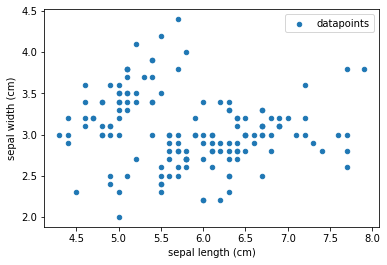

In [12]:
data.plot(x='sepal length (cm)',y='sepal width (cm)',kind='scatter',label='datapoints');
plt.show()

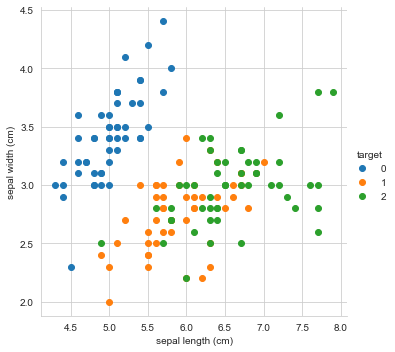

In [13]:
'''Stylize the Graph with distinct target'''
sns.set_style("whitegrid");
sns.FacetGrid(data, hue='target',size=5) \
    .map(plt.scatter, 'sepal length (cm)','sepal width (cm)') \
    .add_legend();
plt.show();

##### Step 6: Create 3D-Scatter Plot for representing 3 Dimensions

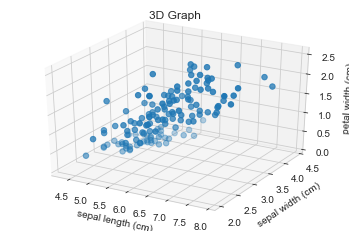

In [14]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.set_zlabel("petal width (cm)")
p3d = ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], data['petal width (cm)'], s=30, cmap = cm.Spectral)
plt.title("3D Graph")
plt.show()

##### Step 6: Create 4D-Scatter Plot for represnting 4 Dimensions

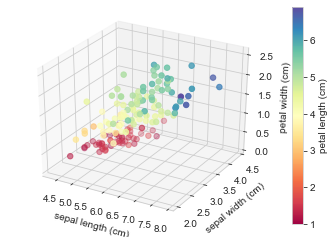

In [15]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.set_zlabel("petal width (cm)")

p3d = ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], data['petal width (cm)'], s=30, c=data['petal length (cm)'], cmap = cm.Spectral)
cbar=fig.colorbar(p3d)
cbar.set_label('petal length (cm)')
plt.show()

<b style="color:red">Basic observation</b> is its <b> hard to analyze the flowers in 3rd and 4th Dimension of Data</b>

##### Step 7: Basic observation for all the dimesnions of flower analysis

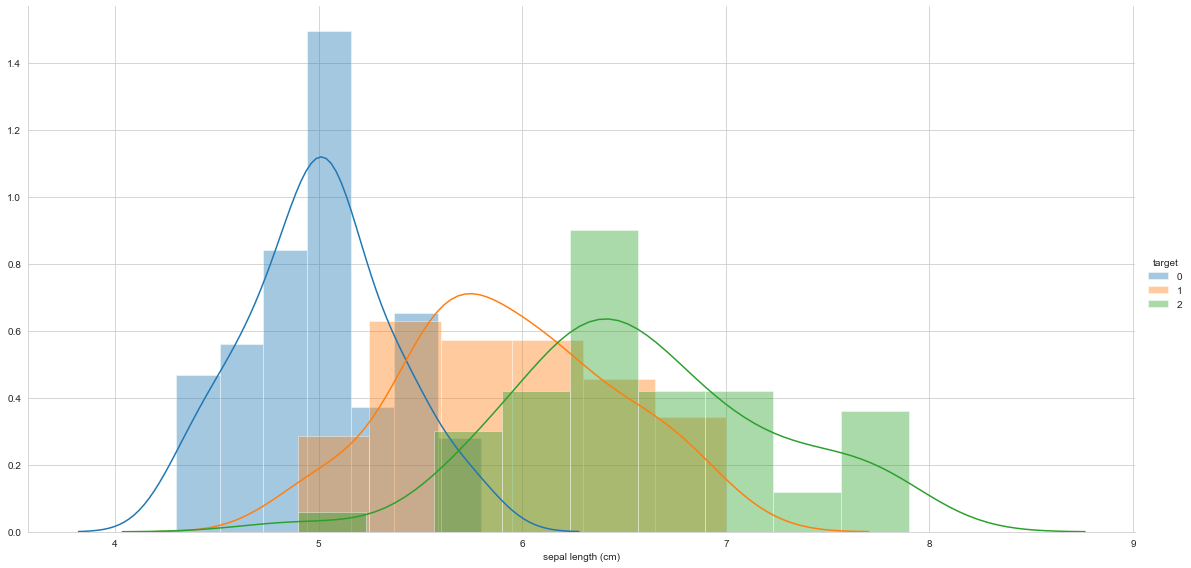

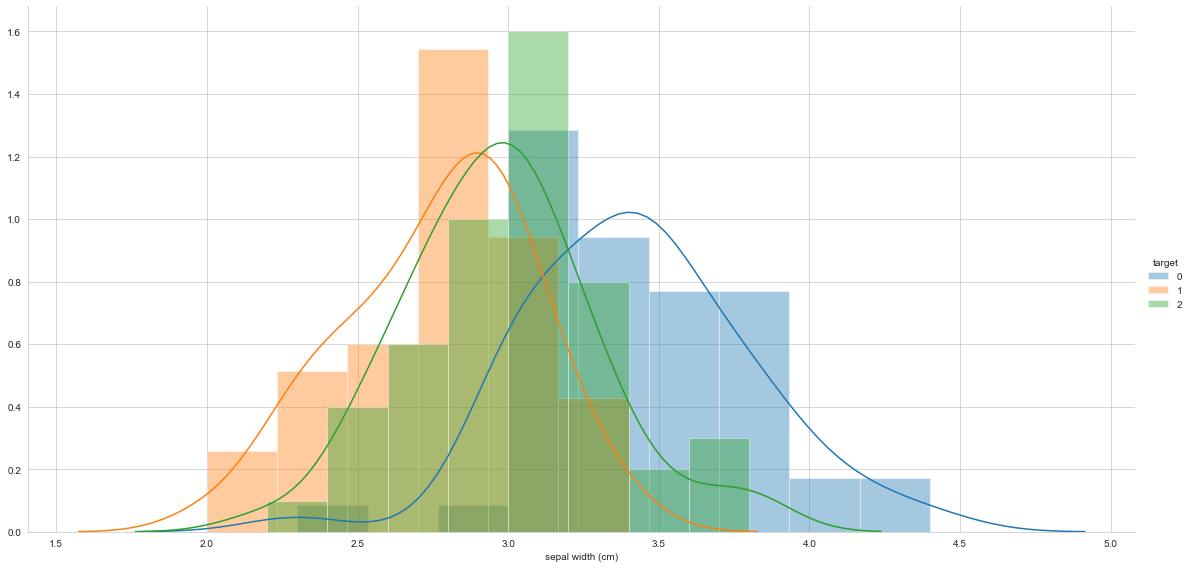

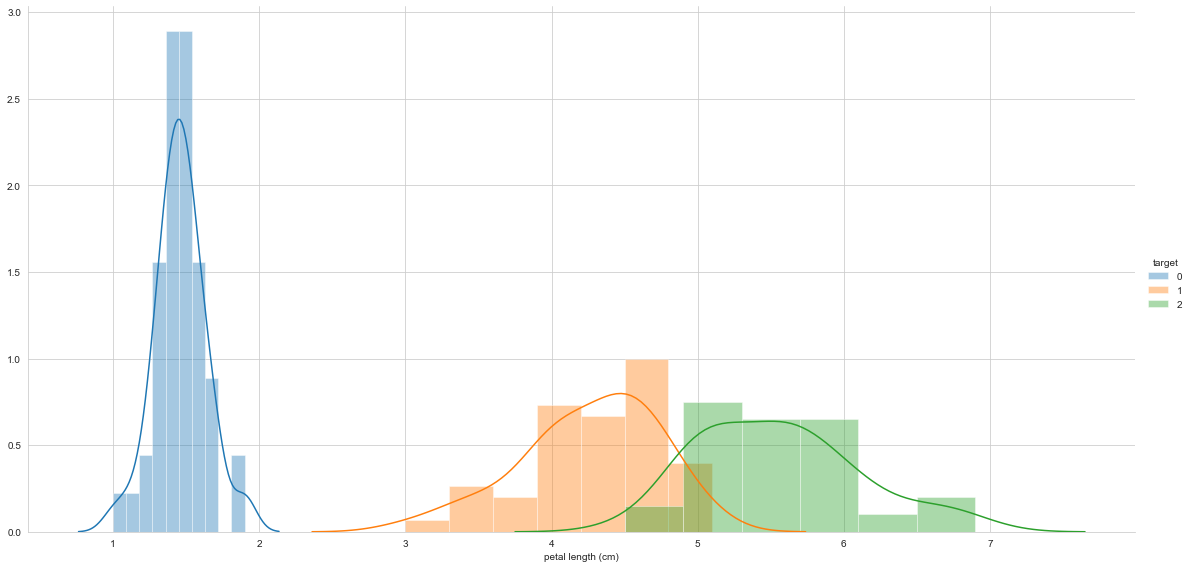

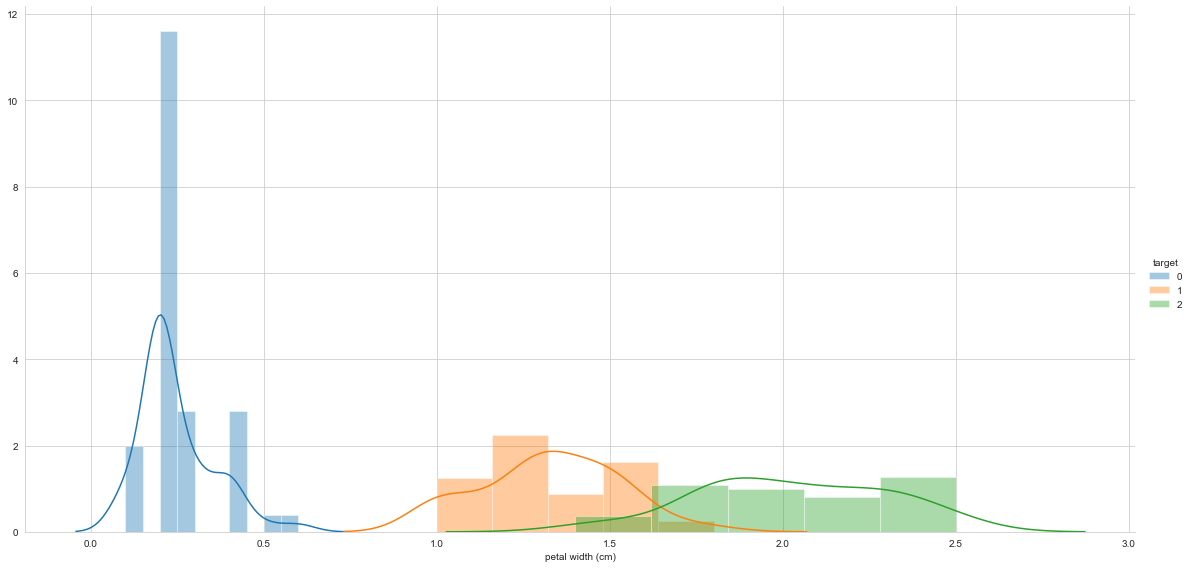

In [16]:
for i in iris.feature_names:
    sns.FacetGrid(data=data,hue="target",height=8,aspect=2).map(sns.distplot,i).add_legend();

##### Step 8: Create pair plots to visualize n-th dimensions

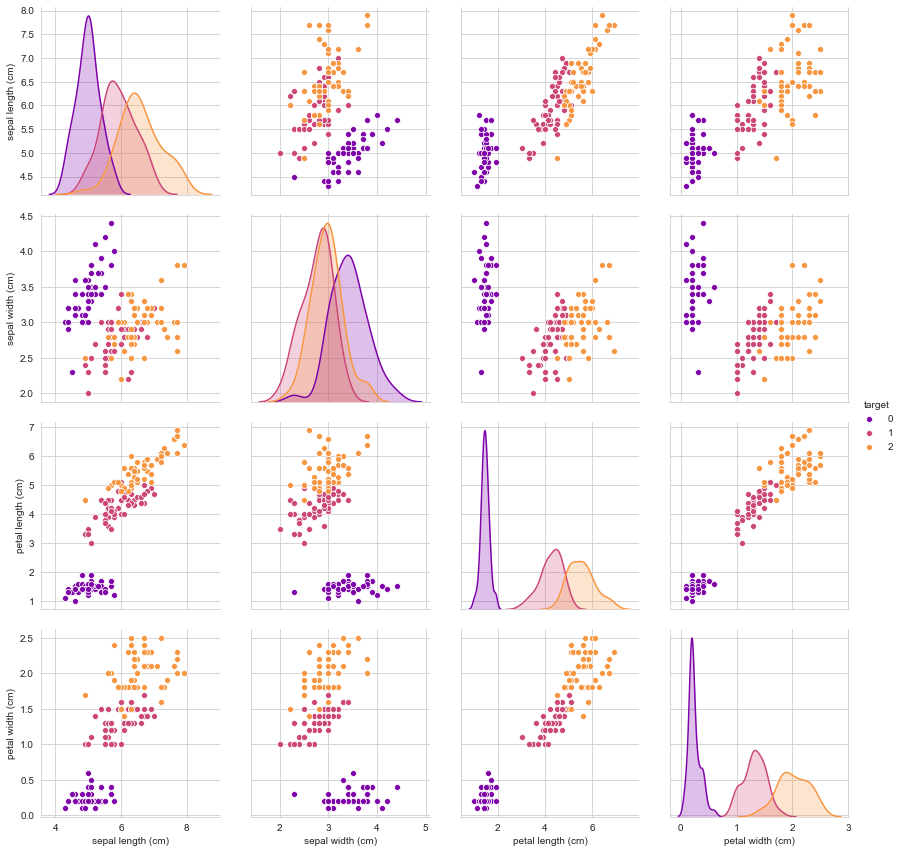

In [17]:
sns.set_style("whitegrid");
sns.pairplot(data,palette='plasma', vars=data.columns[:-1],hue='target', size=3);

<b style="color:red">Basic observation</b> is its <b>  perfect to distinguish between 3 flowers with thses dimensions</b>

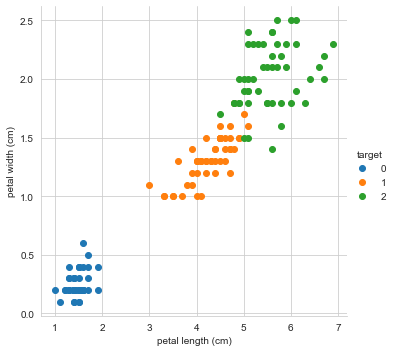

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue='target',size=5) \
    .map(plt.scatter, 'petal length (cm)','petal width (cm)') \
    .add_legend();
plt.show();


in the above case for 4D or 4 features we have 6 plots, Consider <b>100D or 100 features no of plots will be 100C<small>2</small> plots</b>.

##### Step 9: Get the correlation of diemensions

In [19]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


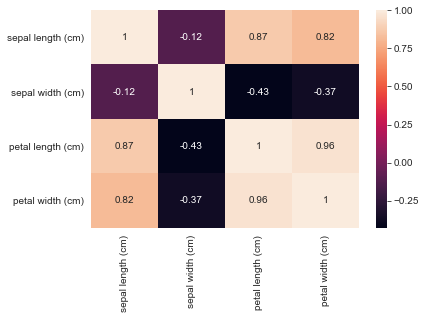

In [20]:
corr = data.drop(['target'],axis=1).corr()
sns.heatmap(corr,annot=True);

##### Step 10: Plot lower Traingle Matrix for correlation

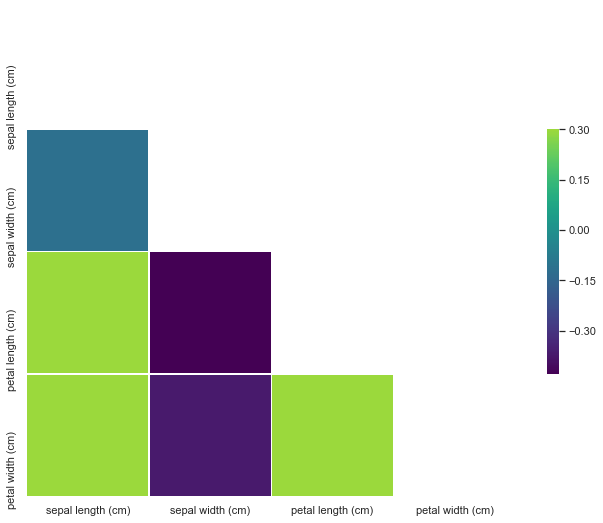

In [21]:
sns.set(style="white")
# Compute the correlation matrix
corr = data.drop(['target'],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##### Step 11: Divide basic Data for PCA

In [22]:
x = data.drop(['target'],axis=1)
y= data['target']

##### Step 12: Perform preprocessing part by fitting Standard Scale

In [23]:
xstd = StandardScaler().fit_transform(x)

##### Step 13: Perform Basic PCA and check the Variance

In [24]:
pca = PCA(n_components=4)
pca.fit(xstd)
features = pca.transform(xstd)

In [25]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

##### Step 14: Plot variance of each Principle components

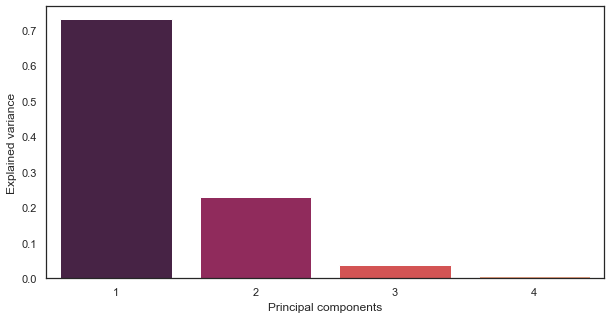

In [26]:
principal_components=[1,2,3,4]
plt.figure(figsize=(10,5))
plt.xlabel("Principal components")
plt.ylabel('Explained variance')
ev = sns.barplot(x=principal_components,y=pca.explained_variance_ratio_ , palette="rocket")

In [27]:
pca = PCA(n_components=2)
pca.fit(xstd)
features = pca.transform(xstd)

##### Step 15:Interpreting the output of PCA

In [28]:
pca_output = pd.DataFrame(features,columns=['principal component 1','principal component 2']) 
pca_output['target'] = data['target']

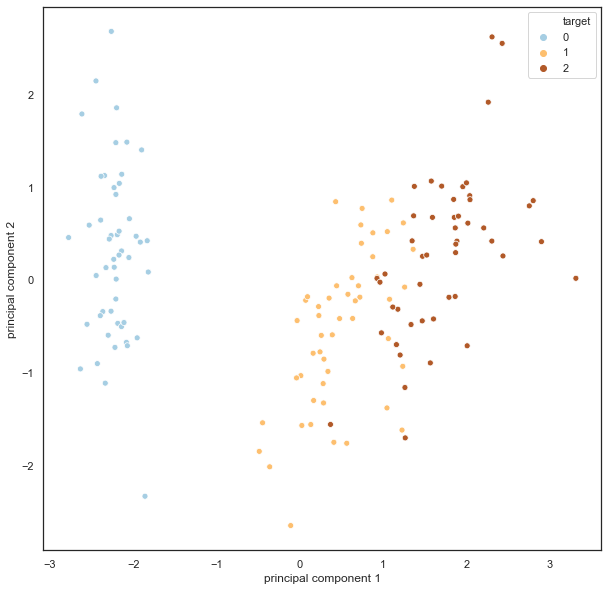

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_output,x='principal component 1',y='principal component 2',hue='target',palette="Paired");

##### Step 16:Splitting the dataset into the Training set and Test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:4].values ,data.iloc[:, 4].values , test_size = 0.2, random_state = 0) 

sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

##### Step 17: Perform the basic Principle components Analysis

In [46]:
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.75079979 0.24920021]


##### Step 18: Fitting Logistic Regression To the training set

In [37]:
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = classifier.predict(X_test) 

##### Step 19: Visualizing the training set results through scatter plot 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


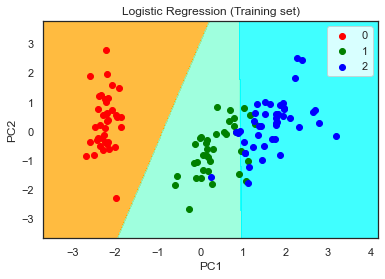

In [40]:
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('orange',  'aquamarine', 'cyan'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
        c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

##### Step 20: Visualizing the test set results through scatter plot 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


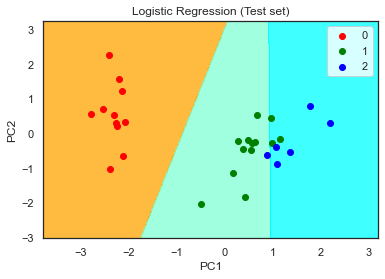

In [41]:
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('orange',  'aquamarine', 'cyan')))
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
        c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show() 

##### Step 21: Creating and Visualizing the confusion

In [47]:
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]


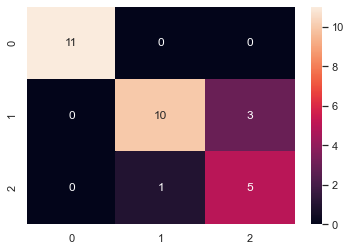

In [48]:
sns.heatmap(cm,annot=True);

##### Step 22: Predict the accuracy of the Priciple Components 1 and 2 for test cases

In [44]:
print('Accuracy Achieved is:'+ str(classifier.score(X_test,y_test)*100)+'%')

Accuracy Achieved is:86.66666666666667%


# THE END